# Diffusion du xénon dans le combustible nucléaire

Projet informatique, Alice PELOSSE & Clément PRAUD

## Modélisation d’un déplacement aléatoire d’atomes
Il s'agit de notre première étape, nécesaire avant de prendre en compte l'interaction avec la matrice de Zirconium et l'interaction entre atomes de Xénon.

Nous pensons gérer le problème avec des listes, chacune asociée à un type de particule. Les listes ont l'avantage par rapport aux array de numpy d'être de tailles varaibles et d'ainsi permettre à notre nombre d'entités pour chaque espèce de varier.
Ainsi, il nous faut générer 4 tableaux indépendants modélisant les atomes présents (Zr, O, C et Xe).
Pour chaque atomes on connait sa position (i,j) correspondant à la ligne et à la colonne dans la matrice.

A titre d'exemple, appeler Xe[10] retournera les coordonnées de l'atome 11 de Xénon (en convention de numérotation Python).


Nous déterminerons l'ensemble des valeurs numériques utilisées à la fin du sujet.


### Déplacement du Xénon

Pour un atome donné Xe on a une probabilité $P$ 
de se déplacer selon une des 9 directions (la 9eme étant on reste sur place).

Pour l'échelle de temps de diffusion, il faut regarder l'équation de diffusion. Nous pourrons ainsi, à l'aide des paramètres initiaux eterminer la longueur interessante pour la modélisation.

Pour la mise à jour de la position des atomes, on prend de manière aléatoire un atome dans le tableau Xe (fonction random) : en effet, il n'y a aucune raison de parcourir la liste dans l'ordre !

Dans un premiere temps, on ne tiendra pas compte du problème de superposition de deux atomes de Xénon puisque nous traiterons la formation de bulles ultérieurement.

#### Initialisation d'une distribution de xénon aléatoire

On place aléatoirement N atomes dans un tableau de taille LxL. Pour cela, on tire aléatoirement pour chaque particule deux nombres i et j entre 0 et L-1 qui correspondent à l'abscisse et l'ordonnée de la particule

[9 8]
[1 6]


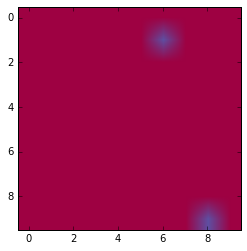

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

#Déclaration des varaibles


L=10                  #Taile de la matrice 
N=2                   #Nombres de particules initialement 
Nbre_Etapes=10       #Nombres d'instants dans l'expérience


def distribution_initiale(N,L):
    """
    Retourne la position des N particules présentes à l'état initial dans la matrice de taille NxN
    La distribution des position est aléatoire.
    Deux atomes peuvent être au même endroit.
    
    Exemple :
        
    >>> distribution_initiale_Xenon(2,10)
    [array([0, 5]), array([6, 2])]

    """
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),randint(0,L-1)])
    return n
    
Xe=distribution_initiale(N,L)

M=np.zeros((L,L))

for i in range(N):
    p=Xe[i]
    print(p)
    M[p[0]][p[1]] =1
    
plt.imshow(M,cmap='Spectral')
plt.show()

Dans notre problème, le xénon arrive d'un coté de la céramique en oxycarbure de Zirconium. on se place en 2D et on suppose que le xénon est produit dans l'oxyde d'uranium situé à gauche de la gaine. Ainsi l'abscisse des particules au départ est fixé à 0 et l'ordonnée est tiré aléatoirement 

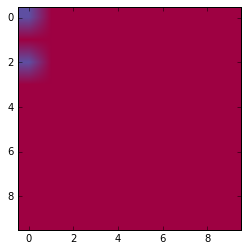

In [9]:
def distribution_initiale_xenon(N,L):
    """
    Retourne la position des N particules présentes à l'état initial dans la matrice de taille NxN
    La distribution des position est aléatoire.
    Deux atomes peuvent être au même endroit.
    
    Exemple :
        
    >>> distribution_initiale_Xenon(2,10)
    [array([0, 5]), array([6, 2])]

    """
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),0]) #modification de l'abscisse par rapport au code précédent
    return n
    
Xe=distribution_initiale_xenon(N,L)

M=np.zeros((L,L))

for i in range(N):
    p=Xe[i]
    M[p[0]][p[1]] =1
    
plt.imshow(M,cmap='Spectral')
plt.show()

#### Marche aléatoire

En première approximation, pour modéliser la diffusion, on utilisera le modèle de marche aléatoire discrète. Chaque atome de xénon peu se déplacer dans chacune des directions.

##### Principe 

On considère deux lois de probabilité qui retourne {-1, 0, 1} avec la probabilité $p = \frac{1}{3}$ pour chaque valeur. Ainsi l'ordonnée et l'abscisse sont modifiés de manière aléatoire. On tiendra compte des conditions au bord; ainsi une particule ne peut pas sortir de la céramique pour le moment. 

|                  |               |               |
| :-----------:    | :-----------: | :-----------: |
| {-1,1}           | {0,1}         | {1,1}         |
| {-1,0}           | {0,0}         | {1,0}         |
| {-1,-1}          | {0,-1}        | {1,-1}        |




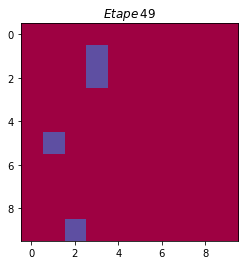

In [4]:
'''Code animation diffusion'''

import random as rd
from pylab import *

# Paramètre
L=10                  #Taile de la matrice 
N=4                   #Nombres de particules initialement 
Nbre_Etapes=50        #Nombres d'instants dans l'expérience

def distribution_initiale_xenon(N,L):
    n=[0]*N
    for i in range(N):
        n[i]=np.array([randint(0,L-1),0]) #modification de l'abscisse par rapport au code précédent
    return n

ion() # mode interaction on
image=plt.figure()
Xe=distribution_initiale_xenon(N,L)
nb_particules=len(Xe)

for k in range(Nbre_Etapes):
    p=rd.randint(0,nb_particules-1)
    (x,y)=(Xe[p][0],Xe[p][1])
    
    (a,b)=(rd.random(),rd.random())
    if a<1./3 :               #Probabilité 1/3 de reculer de 1 selon x
        if x>0.:                #Vérification que la particule peut reculer, dans le cas contraire, elle ne bouge pas
            x-=1             
              
    elif a>2./3 :             #Probabilité 1/3 d'avancer de 1 selon x
        if x<L-1:             #Vérification que la particule peut avancer, dans le cas contraire, elle ne bouge pas
            x+=1              #Pour a entre 1/3 et 2/3 on ne bouge pas selon x
    if b<1./3:                #Même process selon y
        if y>0.:
            y-=1
    elif b>2./3 :
        if y<L-1:
            y+=1
    Xe[p]=np.array([x,y])     #les coordonnées de la particule p sont mises à jours dans Xe
    m_instant=np.zeros((L,L)) #Matrice qui va indiquer la postion des particules      
    for i in range(nb_particules):  #on met à jour la matrice représentant les particules
        m_instant[Xe[i][0],Xe[i][1]] +=1
        
    plt.imshow(m_instant,cmap = 'Spectral')
    plt.title('$Etape\,{}$'.format(k))
    draw() # force le dessin de la figure

ioff() # mode interaction off
show()

### Création et désintégration du Xénon,
Dans la liste des atomes de Xénon on enlève et ajoute des atomes selon la loi de désintégration de l'iode et de l'uranium et celle du xénon.

![produit de fission avec temps de demi-vie de la fission de l'Uranium](https://upload.wikimedia.org/wikipedia/commons/d/d5/Chaine_Xenon.PNG)

#### Désintegration du Xénon 135

Cette loi est de la forme : $$ N(t) = N{o} \exp \left(-\lambda t\right) $$ avec N le nombre de particules à l'instant t et $N{o}$ le nombre de particules à l'instant initial.
On peut relier \lambda au temps de demi-vie d'un élement $\tau_{\frac{1}{2}}$ 
$$ \lambda = \frac{ln(2)}{\tau_{\frac{1}{2}}}$$

Pour modéliser cette décroissance radioactive, on prend tire à chaque étape k au hasard un nombre p' entre 0 et 1, si $p' > \exp(-k \lambda) $ la particule est désintégrée sinon elle reste.
Les étapes k propres à chaque atome modélise la vie de l'atome. 

A chaque étape, on commencera donc par tester sur la particule la condition de désintegration. Si le Xénon se désintègre en Césium, on l'élimine du tableau. 

De plus, le xénon 135 peut capturer un neutron et se transformer en Xénon 136 stable. Le xénon 136 peut alors s'accumuler dans le réacteur : on parle d'empoisonnement au Xénon. Il faut donc distinguer dans notre modélisation les deux isotopes de xénon. Sous la forme Xénon 136 table, le temps de vie de l'atome n'est pas importante. On fixera donc pour chaque atome stable le nombre d'étapes à NONE.

On modélise de la même manière la désintégration du xénon 135 en césium et en xénon 136. En effet, pour un flux neutronique en réacteur de l'ordre de $1.10^{14} cm^{-2} s^{-1}$, la section efficace du xénon est de l'ordre de $σ=2.65.10^{-18} cm^{2}$, conduit à une probabilité de capture de $p = 2.65.10^{-4} s^{-1}$.  
Ainsi après avoir testé si l'atome se désintègre en césium, on teste si il capte un neutron avec le test $p' < p = 2.65.10^{-4} $. 

Nous verons ultérieurement si il est utile de distinguer sur le graph les deux isotopes. 







In [11]:
from random import random

#tau : temps de demi-vie
def desintegration(tau,k):
    '''fonction modélisant la desintegration  nucleaire. Retourne False
    si la particule n'est pas désintegrer, retourne True sinon'''
    p = random()
    return(p>np.exp(-np.log(2)*k/tau)) #modélisation de la loi de decroissance nucleaire

#### Ajout de Xénon

   La réaction de fission nucléaire produit du Telium, de l'iode et du Xénon. On ne s'occupe pas du Telium et de l'iode, seulement du Xénon puisque le telium se désintègre en Iode qui se désintègre en Xénon.
A chaque étape on ajoute avec une probabilté p, un element de Xénon à l'entrée de la matrice.

